# Antidepressant & Social Media Use

In [1]:
# Importing libraries
import pandas as pd
import seaborn as sns
import matplotlib as plt
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Read in dataset on pharmaceutical consumption by country & Year (https://stats.oecd.org/index.aspx?queryid=30123#)
df_pharma = pd.read_csv('HEALTH_PHMC_08092019205322815.csv')

In [3]:
df_pharma.Variable.unique()

array(['A-Alimentary tract and metabolism', 'A02A-Antacids',
       'A02B-Drugs for peptic ulcer and gastro-oesophageal reflux diseases (GORD)',
       'A10-Drugs used in diabetes', 'B-Blood and blood forming organs',
       'C-Cardiovascular system', 'C01A-Cardiac glycosides',
       'C01B-Antiarrhythmics, Class I and III', 'C02-Antihypertensives',
       'C03-Diuretics', 'C07-Beta blocking agents',
       'C08-Calcium channel blockers',
       'C09-Agents acting on the Renin-Angiotensin system',
       'C10-Lipid modifying agents',
       'G-Genito urinary system and sex hormones',
       'G03-Sex hormones and modulators of the genital system',
       'H-Systemic hormonal preparations, excluding sex hormones and insulins',
       'J-Antiinfectives for systemic use',
       'J01-Antibacterials for systemic use', 'M-Musculo-skeletal system',
       'M01A-Antiinflammatory and antirheumatic products non-steroids',
       'N-Nervous system', 'N02-Analgesics', 'N05B-Anxiolytics',
       'N

In [4]:
# Filter dataframe to only rows that contain information on N or N06A products
df_pharma_N = df_pharma[df_pharma['Variable'].isin (['N-Nervous system','N06A-Antidepressants'])]

# Test if succeeded
df_pharma_N.Variable.unique()

array(['N-Nervous system', 'N06A-Antidepressants'], dtype=object)

In [5]:
df_pharma_N.dtypes

VAR            object
Variable       object
UNIT           object
Measure        object
COU            object
Country        object
YEA             int64
Year            int64
Value         float64
Flag Codes     object
Flags          object
dtype: object

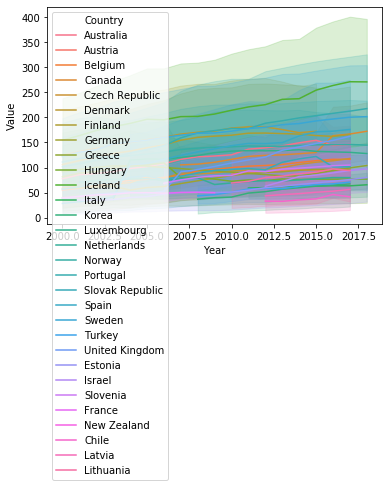

In [6]:
sns.lineplot(x = 'Year', y = 'Value', hue = 'Country', data = df_pharma_N)

In [7]:
df_pharma_N.head()

,VAR,Variable,UNIT,Measure,COU,Country,YEA,Year,Value,Flag Codes,Flags
8023,PHARCNSY,N-Nervous system,NBPYEANB,Defined daily dosage per 1 000 inhabitants per...,AUS,Australia,2000,2000,109.5,D,Difference in methodology
8024,PHARCNSY,N-Nervous system,NBPYEANB,Defined daily dosage per 1 000 inhabitants per...,AUS,Australia,2001,2001,118.1,D,Difference in methodology
8025,PHARCNSY,N-Nervous system,NBPYEANB,Defined daily dosage per 1 000 inhabitants per...,AUS,Australia,2002,2002,121.0,D,Difference in methodology
8026,PHARCNSY,N-Nervous system,NBPYEANB,Defined daily dosage per 1 000 inhabitants per...,AUS,Australia,2003,2003,125.0,D,Difference in methodology
8027,PHARCNSY,N-Nervous system,NBPYEANB,Defined daily dosage per 1 000 inhabitants per...,AUS,Australia,2004,2004,132.7,D,Difference in methodology


In [8]:
df_pharma_N.UNIT.unique()

array(['NBPYEANB'], dtype=object)

In [95]:
df_pharma_N06.Country.unique()

array(['Australia', 'Austria', 'Belgium', 'Canada', 'Czech Republic',
       'Denmark', 'Finland', 'France', 'Germany', 'Greece', 'Hungary',
       'Iceland', 'Italy', 'Korea', 'Luxembourg', 'Netherlands',
       'New Zealand', 'Norway', 'Portugal', 'Slovak Republic', 'Spain',
       'Sweden', 'Turkey', 'United Kingdom', 'Chile', 'Estonia', 'Israel',
       'Slovenia', 'Latvia', 'Lithuania'], dtype=object)

In [9]:
df_pharma_N['Measure'].unique()

array(['Defined daily dosage per 1 000 inhabitants per day'], dtype=object)

In [10]:
# New Dataset for only Antidepressants (N06)
df_pharma_N06 = df_pharma_N[df_pharma_N['Variable'].isin (['N06A-Antidepressants'])]

In [11]:
# Drop columns (Measure, UNIT, VAR only have 1 value; Flags and Flag Code not relevant, YEA duplicate)
df_pharma_N06 = df_pharma_N06.drop(columns = ['Measure', 'Flag Codes', 'UNIT', 'VAR','YEA','Flags'])

In [12]:
# Drop index
df_pharma_N06 = df_pharma_N06.reset_index(drop=True)

In [13]:
# Checking for NaNs
df_pharma_N06.isnull().sum()

Variable    0
COU         0
Country     0
Year        0
Value       0
dtype: int64

In [14]:
# Shape
df_pharma_N06.shape

(414, 5)

In [15]:
df_pharma_N06.Country.unique()

array(['Australia', 'Austria', 'Belgium', 'Canada', 'Czech Republic',
       'Denmark', 'Finland', 'France', 'Germany', 'Greece', 'Hungary',
       'Iceland', 'Italy', 'Korea', 'Luxembourg', 'Netherlands',
       'New Zealand', 'Norway', 'Portugal', 'Slovak Republic', 'Spain',
       'Sweden', 'Turkey', 'United Kingdom', 'Chile', 'Estonia', 'Israel',
       'Slovenia', 'Latvia', 'Lithuania'], dtype=object)

In [16]:
df_pharma_N06_2014 = df_pharma_N06[df_pharma_N06['Year']==2014]                               

In [17]:
df_pharma_N06_2017 = df_pharma_N06[df_pharma_N06['Year']==2017]

In [18]:
df_pharma_N06_2018 = df_pharma_N06[df_pharma_N06['Year']==2018]

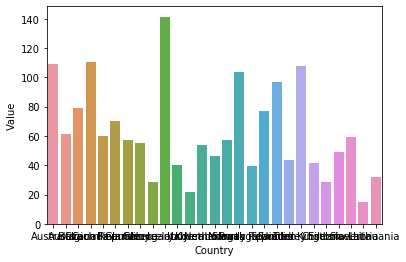

In [19]:
sns.barplot(x='Country', y='Value', data=df_pharma_N06_2017)
plt.rcParams['figure.figsize']=50,10

In [20]:
df_pharma_N06.head()

,Variable,COU,Country,Year,Value
0,N06A-Antidepressants,AUS,Australia,2000,45.4
1,N06A-Antidepressants,AUS,Australia,2001,53.2
2,N06A-Antidepressants,AUS,Australia,2002,54.7
3,N06A-Antidepressants,AUS,Australia,2003,58.5
4,N06A-Antidepressants,AUS,Australia,2004,63.4


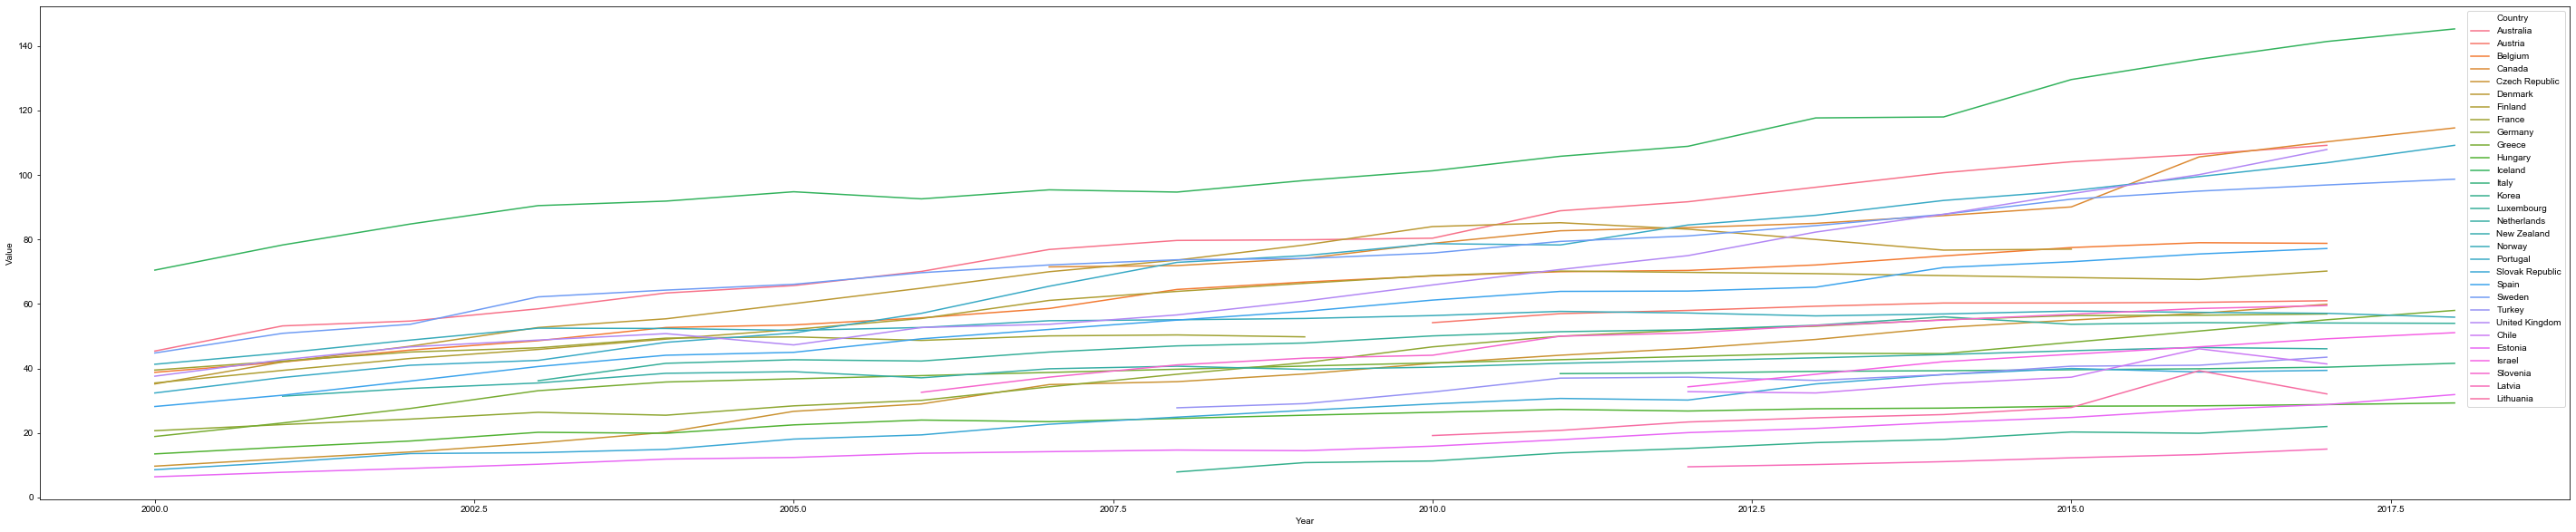

In [21]:
sns.lineplot(x='Year', y='Value', hue='Country', data =df_pharma_N06)
sns.set_style('white')

In [22]:
#plot_group_country = df_pharma_N06[["Value"]].groupby(["Year"]).agg("count")


## Webscraping

In [23]:
import requests
import json 
import pandas as pd
from bs4 import BeautifulSoup

In [24]:
url = 'https://www.statista.com/statistics/295660/active-social-media-penetration-in-european-countries/'

html = requests.get(url).content
 
soup = BeautifulSoup(html, "lxml")  # Check documentation to specify 'features'
#soup



In [25]:
social = soup.find_all('div',attrs = {'class':"statistic__wrapper"})


In [26]:
social_lst = [s.text.replace('\n','').replace(' ','').replace('Loadingstatistic...ExpandstatisticActivesocialmediapenetration','') for s in social[0:]]
#social_lst = [s.text.replace(' ','').strip(' ') for s in social[0:]]
#social_lst2 = [s.text.replace('\nLoadingstatistic...\n\nExpandstatisticActivesocialmediapenetration','') for s in social[0:]]
social_lst

['Albania51%Andorra65%Austria50%Belarus40%Belgium65%Bosnia&Herzegovina49%Bulgaria54%Croatia48%Czechia54%Denmark71%Estonia57%Finland59%France58%Germany46%Gibraltar72%Greece54%Guernsey58%Hungary62%Iceland83%RepublicofIreland66%Italy59%Kosovo40%Latvia51%Liechtenstein44%Lithuania59%Luxembourg62%Malta88%Moldova30%Monaco99%Montenegro60%Netherlands64%Norway71%Poland47%Portugal65%Romania56%Serbia43%Slovakia50%Slovenia53%Spain60%Sweden72%Switzerland51%TheFaroeIslands75%Ukraine39%UnitedKingdom(UK)67%ActivesocialmediapenetrationAlbania51%Andorra65%Austria50%Belarus40%Belgium65%Bosnia&Herzegovina49%Bulgaria54%Croatia48%Czechia54%Denmark71%Estonia57%Finland59%France58%Germany46%Gibraltar72%Greece54%Guernsey58%Hungary62%Iceland83%RepublicofIreland66%Italy59%Kosovo40%Latvia51%Liechtenstein44%Lithuania59%Luxembourg62%Malta88%Moldova30%Monaco99%Montenegro60%Netherlands64%Norway71%Poland47%Portugal65%Romania56%Serbia43%Slovakia50%Slovenia53%Spain60%Sweden72%Switzerland51%TheFaroeIslands75%Ukraine39%Unit

In [27]:
# Import regular expressions library
import re

In [28]:
# Flatten list
#one_list = [item for sublist in social_lst1 for item in sublist]

In [29]:
# For loop

#new_lst = []
#for s in social_lst:
    #sep = regex.split(s)
    #new_lst.append(sep)
    
# List comprehension

#new_lst = [regex.split(s) for s in social_lst]
    

In [30]:
regex = re.compile("([a-zA-Z]+)([0-9]+)")
new_lst = [regex.split(s) for s in social_lst]

In [31]:
new_lst

[['',
  'Albania',
  '51',
  '%',
  'Andorra',
  '65',
  '%',
  'Austria',
  '50',
  '%',
  'Belarus',
  '40',
  '%',
  'Belgium',
  '65',
  '%Bosnia&',
  'Herzegovina',
  '49',
  '%',
  'Bulgaria',
  '54',
  '%',
  'Croatia',
  '48',
  '%',
  'Czechia',
  '54',
  '%',
  'Denmark',
  '71',
  '%',
  'Estonia',
  '57',
  '%',
  'Finland',
  '59',
  '%',
  'France',
  '58',
  '%',
  'Germany',
  '46',
  '%',
  'Gibraltar',
  '72',
  '%',
  'Greece',
  '54',
  '%',
  'Guernsey',
  '58',
  '%',
  'Hungary',
  '62',
  '%',
  'Iceland',
  '83',
  '%',
  'RepublicofIreland',
  '66',
  '%',
  'Italy',
  '59',
  '%',
  'Kosovo',
  '40',
  '%',
  'Latvia',
  '51',
  '%',
  'Liechtenstein',
  '44',
  '%',
  'Lithuania',
  '59',
  '%',
  'Luxembourg',
  '62',
  '%',
  'Malta',
  '88',
  '%',
  'Moldova',
  '30',
  '%',
  'Monaco',
  '99',
  '%',
  'Montenegro',
  '60',
  '%',
  'Netherlands',
  '64',
  '%',
  'Norway',
  '71',
  '%',
  'Poland',
  '47',
  '%',
  'Portugal',
  '65',
  '%',
  'Romani

In [32]:
# Create DataFrame
df_social = pd.DataFrame(new_lst)
df_social = df_social.transpose()

In [33]:
# Create new empty column 'Percentage'
df_social.insert(1,'Percentage','')

In [34]:
# Testing
df_social.head()

,0,Percentage
0,,
1,Albania,
2,51,
3,%,
4,Andorra,


In [35]:
# Renaming column name '0' to 'Country'
df_social = df_social.rename(columns={0:'Country'})

In [36]:
# Dropping rows with % characters
df_social = df_social[(df_social['Country']!='%')]

In [37]:
# Dropping rows
df_social_drop = df_social.drop([0])

# Dropping index 0 because empty

df_social_drop.tail()

,Country,Percentage
253,TheFaroeIslands,
254,75,
256,Ukraine,
257,39,
258,%UnitedKingdom(UK)67%,


In [38]:
# Dropping rows that contain 'United Kingdom'. We will add that country later on manually: %UnitedKingdom(UK)67%

df_social_drop = df_social_drop[~df_social_drop['Country'].str.contains('UnitedKingdom')]

In [39]:
# Dropping values for Bosnia & Herzegovina15,16,17 wrong format and we do not have data on these countries in the pharma dataset.
df_social_drop = df_social_drop[~df_social_drop['Country'].str.contains('Bosnia')]
df_social_drop = df_social_drop[~df_social_drop['Country'].str.contains('Herzegovina')]
df_social_drop = df_social_drop[~df_social_drop['Country'].str.contains('49')]

In [40]:
df_social_drop.tail()

,Country,Percentage
251,51,
253,TheFaroeIslands,
254,75,
256,Ukraine,
257,39,


In [41]:
# Testing
df_social_drop.head()

,Country,Percentage
1,Albania,
2,51,
4,Andorra,
5,65,
7,Austria,


In [42]:
# Adding the percentage into the new percentage column
new_df_social = pd.DataFrame({'Country':df_social_drop['Country'].iloc[::2].values, 'Percentage':df_social_drop['Country'].iloc[1::2].values})
new_df_social[30:40]

,Country,Percentage
30,Norway,71
31,Poland,47
32,Portugal,65
33,Romania,56
34,Serbia,43
35,Slovakia,50
36,Slovenia,53
37,Spain,60
38,Sweden,72
39,Switzerland,51


In [43]:
# Dropping duplicate values

new_df_social = new_df_social.drop_duplicates()


In [44]:
new_df_social

,Country,Percentage
0,Albania,51
1,Andorra,65
2,Austria,50
3,Belarus,40
4,Belgium,65
5,Bulgaria,54
6,Croatia,48
7,Czechia,54
8,Denmark,71
9,Estonia,57


In [45]:
# Dropping last duplicate row
new_df_social = new_df_social.drop([42])

In [46]:
# Adding UK to the dataframe
dfUK = pd.DataFrame({"Country":{42:'United Kingdom'},'Percentage':{42:'67'}}) 

In [47]:
# Appending
new_df_social = new_df_social.append(dfUK) 

In [48]:
# Final dataframe social media per country
new_df_social

,Country,Percentage
0,Albania,51
1,Andorra,65
2,Austria,50
3,Belarus,40
4,Belgium,65
5,Bulgaria,54
6,Croatia,48
7,Czechia,54
8,Denmark,71
9,Estonia,57


In [49]:
df_pharma_N06_2017['Value'].isnull().sum()

0

In [50]:
# Deciding on common countries in both datasets

print(df_pharma_N06_2017.Country.unique())

['Australia' 'Austria' 'Belgium' 'Canada' 'Czech Republic' 'Finland'
 'Germany' 'Greece' 'Hungary' 'Iceland' 'Italy' 'Korea' 'Luxembourg'
 'Netherlands' 'Norway' 'Portugal' 'Slovak Republic' 'Spain' 'Sweden'
 'Turkey' 'United Kingdom' 'Chile' 'Estonia' 'Israel' 'Slovenia' 'Latvia'
 'Lithuania']


In [51]:
print(new_df_social.Country.unique())

['Albania' 'Andorra' 'Austria' 'Belarus' 'Belgium' 'Bulgaria' 'Croatia'
 'Czechia' 'Denmark' 'Estonia' 'Finland' 'France' 'Germany' 'Gibraltar'
 'Greece' 'Guernsey' 'Hungary' 'Iceland' 'RepublicofIreland' 'Italy'
 'Kosovo' 'Latvia' 'Liechtenstein' 'Lithuania' 'Luxembourg' 'Malta'
 'Moldova' 'Monaco' 'Montenegro' 'Netherlands' 'Norway' 'Poland'
 'Portugal' 'Romania' 'Serbia' 'Slovakia' 'Slovenia' 'Spain' 'Sweden'
 'Switzerland' 'TheFaroeIslands' 'Ukraine' 'United Kingdom']


In [52]:
# We choose the following countries:

# Austria, Belgium, Finland, Germany, Greece, Hungary, Iceland, Italy, 
# Luxembourg, Lithuania, Latvia, Estonia, Slovenia, United Kingdom, Netherlands, Norway, Portugal, 
# Slovakia,Spain, Sweden

In [53]:
# Renaming country names in social media dataset to merge
new_df_social['Country'].replace({'Slovakia': 'Slovak Republic', 'Czechia': 'Czech Republic'}, inplace=True)

new_df_social.Country.unique()

array(['Albania', 'Andorra', 'Austria', 'Belarus', 'Belgium', 'Bulgaria',
       'Croatia', 'Czech Republic', 'Denmark', 'Estonia', 'Finland',
       'France', 'Germany', 'Gibraltar', 'Greece', 'Guernsey', 'Hungary',
       'Iceland', 'RepublicofIreland', 'Italy', 'Kosovo', 'Latvia',
       'Liechtenstein', 'Lithuania', 'Luxembourg', 'Malta', 'Moldova',
       'Monaco', 'Montenegro', 'Netherlands', 'Norway', 'Poland',
       'Portugal', 'Romania', 'Serbia', 'Slovak Republic', 'Slovenia',
       'Spain', 'Sweden', 'Switzerland', 'TheFaroeIslands', 'Ukraine',
       'United Kingdom'], dtype=object)

In [54]:
combined_df = pd.merge(df_pharma_N06_2017,new_df_social[['Country','Percentage']], on='Country')

In [55]:
combined_df

,Variable,COU,Country,Year,Value,Percentage
0,N06A-Antidepressants,AUT,Austria,2017,61.0,50
1,N06A-Antidepressants,BEL,Belgium,2017,78.8,65
2,N06A-Antidepressants,CZE,Czech Republic,2017,59.9,54
3,N06A-Antidepressants,FIN,Finland,2017,70.2,59
4,N06A-Antidepressants,DEU,Germany,2017,56.9,46
5,N06A-Antidepressants,GRC,Greece,2017,55.1,54
6,N06A-Antidepressants,HUN,Hungary,2017,28.8,62
7,N06A-Antidepressants,ISL,Iceland,2017,141.4,83
8,N06A-Antidepressants,ITA,Italy,2017,40.4,59
9,N06A-Antidepressants,LUX,Luxembourg,2017,54.1,62


In [56]:
# Checking types
combined_df.dtypes

Variable       object
COU            object
Country        object
Year            int64
Value         float64
Percentage     object
dtype: object

In [57]:
# Changing datatype Percentage
combined_df['Percentage'] = pd.to_numeric(combined_df['Percentage'])


In [58]:
# Check
combined_df.dtypes

Variable       object
COU            object
Country        object
Year            int64
Value         float64
Percentage      int64
dtype: object

In [59]:
#reg = sns.regplot(x='Percentage', y ='Value', data = combined_df)
#plt.rcParams['figure.figsize']=9,7
#plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
#reg.spines['right'].set_visible(False)
#reg.spines['top'].set_visible(False)
#reg.spines['right'].set_visible(False)
#reg.spines['top'].set_visible(False)

In [60]:
#sns.pairplot(combined_df, kind='reg')

### Linear Regression

In [61]:
import scipy
from scipy import stats

In [62]:
X = combined_df['Percentage']
Y = combined_df['Value']

slope, intercept, r_value,p_value, std_err = stats.linregress(X, Y)

print(stats.linregress(X, Y))


LinregressResult(slope=2.3603219165262965, intercept=-79.55650383679584, rvalue=0.6750566803726034, pvalue=0.0007867697578795408, stderr=0.591796999907399)


In [86]:
print("R-squared: %f" % 0.6750566803726034**2)


R-squared: 0.455702


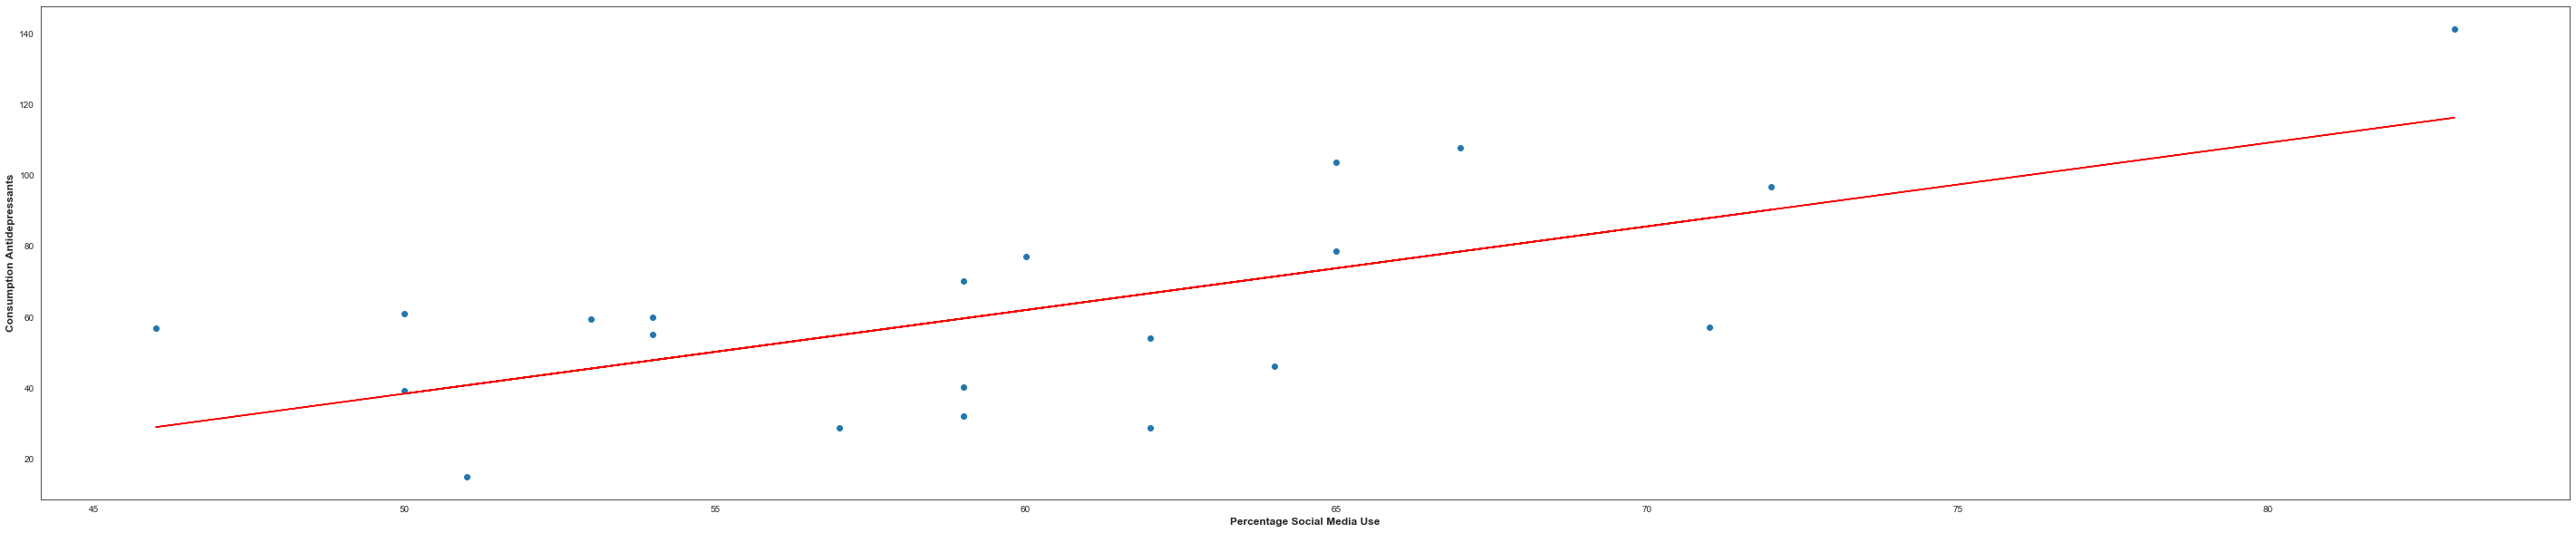

In [64]:
lr = plt.scatter(X,Y)
plt.plot(X, slope*X+intercept, color='red')
#plt.title('Linear Regression', fontsize=14, fontweight='bold')
plt.rcParams['figure.figsize']=5,5
plt.xlabel('Percentage Social Media Use',fontsize=12, fontweight="bold")
plt.ylabel('Consumption Antidepressants',fontsize=12, fontweight="bold")
plt.show()


In [65]:
#crosstabs = pd.crosstabs(combined_df)

In [66]:
combined_df.corr()

,Year,Value,Percentage
Year,NaN,NaN,NaN
Value,NaN,1.000000,0.675057
Percentage,NaN,0.675057,1.000000


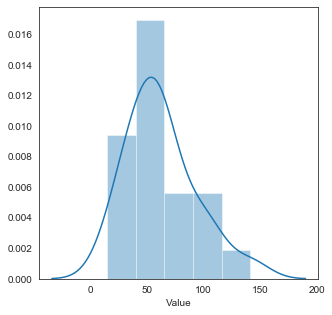

In [67]:
sns.distplot(combined_df['Value'], bins=5)

In [69]:
combined_df.Country.unique()

array(['Austria', 'Belgium', 'Czech Republic', 'Finland', 'Germany',
       'Greece', 'Hungary', 'Iceland', 'Italy', 'Luxembourg',
       'Netherlands', 'Norway', 'Portugal', 'Slovak Republic', 'Spain',
       'Sweden', 'United Kingdom', 'Estonia', 'Slovenia', 'Latvia',
       'Lithuania'], dtype=object)

In [70]:
# Plotting development antidepressant consumption over time

Pharma_years = df_pharma_N06[df_pharma_N06['Country'].isin(['Austria', 'Belgium', 'Czech Republic', 'Finland', 'Germany','Greece', 'Hungary', 'Iceland', 'Italy', 'Luxembourg','Netherlands', 'Norway', 'Portugal', 'Slovak Republic', 'Spain','Sweden', 'United Kingdom', 'Estonia', 'Slovenia', 'Latvia','Lithuania'])]

In [71]:
Pharma_years.Country.unique()

array(['Austria', 'Belgium', 'Czech Republic', 'Finland', 'Germany',
       'Greece', 'Hungary', 'Iceland', 'Italy', 'Luxembourg',
       'Netherlands', 'Norway', 'Portugal', 'Slovak Republic', 'Spain',
       'Sweden', 'United Kingdom', 'Estonia', 'Slovenia', 'Latvia',
       'Lithuania'], dtype=object)

In [72]:
Pharma_years.head(10)

,Variable,COU,Country,Year,Value
18,N06A-Antidepressants,AUT,Austria,2010,54.2
19,N06A-Antidepressants,AUT,Austria,2011,57.0
20,N06A-Antidepressants,AUT,Austria,2012,58.0
21,N06A-Antidepressants,AUT,Austria,2013,59.3
22,N06A-Antidepressants,AUT,Austria,2014,60.3
23,N06A-Antidepressants,AUT,Austria,2015,60.3
24,N06A-Antidepressants,AUT,Austria,2016,60.5
25,N06A-Antidepressants,AUT,Austria,2017,61.0
26,N06A-Antidepressants,BEL,Belgium,2000,38.8
27,N06A-Antidepressants,BEL,Belgium,2001,42.0


In [73]:
# group by country

Pharma_years_grouped = pd.DataFrame(Pharma_years['Value'].groupby(Pharma_years['Country']).agg('sum'))

In [74]:
Pharma_years_grouped

,Value
Country,
Austria,470.6
Belgium,1118.3
Czech Republic,643.4
Estonia,326.2
Finland,1065.0
Germany,718.9
Greece,389.0
Hungary,457.2
Iceland,1995.7


In [75]:
Pharma_years_grouped2 = pd.DataFrame(Pharma_years.groupby(Pharma_years['Year']).agg('sum'))

In [76]:
Pharma_years_grouped2

,Value
Year,
2000,406.9
2001,490.4
2002,539.8
2003,624.1
2004,661.7
2005,651.4
2006,713.4
2007,765.3
2008,803.4


In [77]:
perc = 1310.4/406.9
perc

3.2204472843450485

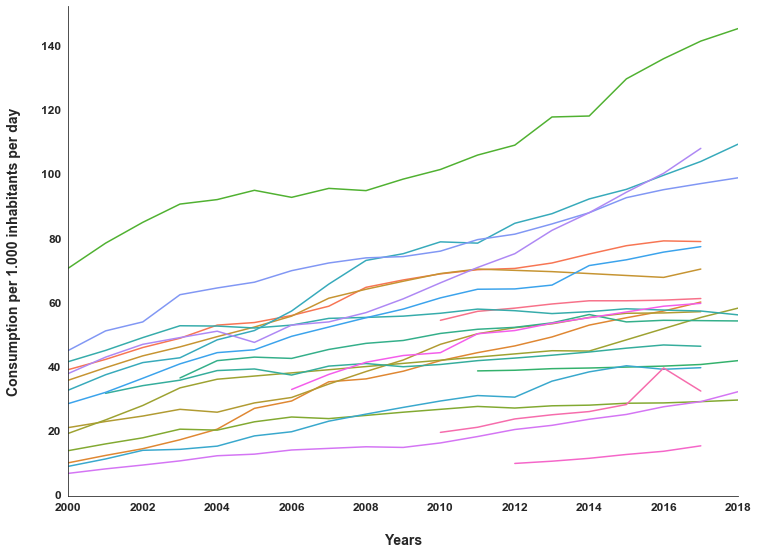

In [90]:
# Plotting Timeline Antidepressant Consumption by Country

ax = sns.lineplot (x='Year', y='Value', hue= 'Country', data =Pharma_years )
plt.rcParams['figure.figsize']=12,9
#plt.title("Timeline consumption by Countries", fontsize = 16, fontweight="bold")
plt.xlabel('\nYears',fontsize=14, fontweight="bold")
plt.ylabel('Consumption per 1.000 inhabitants per day\n',fontsize=14, fontweight="bold")
plt.xlim(2000,2018)
#plt.box(False)
#plt.legend(loc='upper right', frameon=True)
plt.xticks(fontsize=12, fontweight="bold")
plt.yticks(fontsize=12, fontweight="bold")
#plt.ylabel('Consumption per 1.000 inhabitants per day',fontsize=14, fontweight="bold")

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.get_legend().remove()
#ax.yaxis.set_ticks_position('left')
#ax.xaxis.set_ticks_position('right')
#plt.savefig('timeline_country_consumption.png', dpi=300)
plt.show()


In [79]:
combined_df.head()

,Variable,COU,Country,Year,Value,Percentage
0,N06A-Antidepressants,AUT,Austria,2017,61.0,50
1,N06A-Antidepressants,BEL,Belgium,2017,78.8,65
2,N06A-Antidepressants,CZE,Czech Republic,2017,59.9,54
3,N06A-Antidepressants,FIN,Finland,2017,70.2,59
4,N06A-Antidepressants,DEU,Germany,2017,56.9,46


In [80]:
combined_df_sorted = combined_df.sort_values(by='Value', ascending = False)

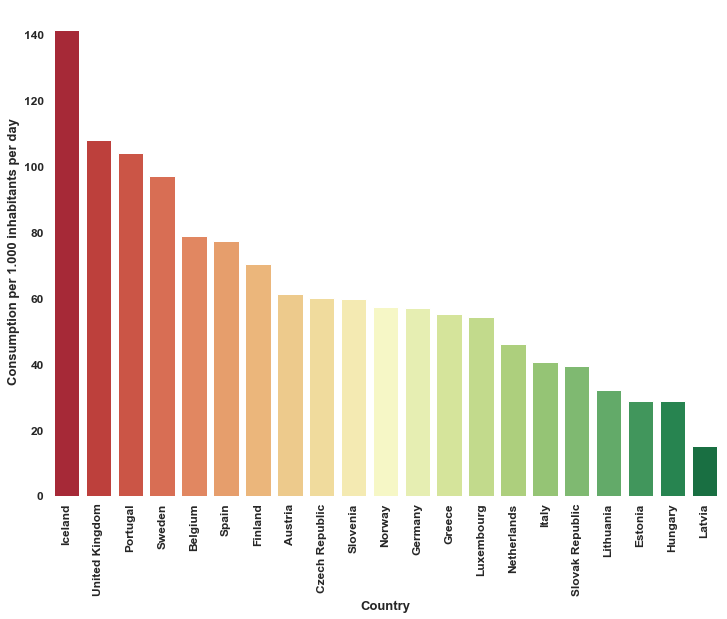

In [81]:
# Plotting Antidepressants by country

bar_2017 = sns.barplot(x="Country", y="Value", data = combined_df_sorted, palette = "RdYlGn" )
plt.rcParams['figure.figsize']=16,6
plt.xticks(fontsize=12, fontweight="bold",rotation='vertical')
plt.yticks(fontsize=12, fontweight="bold")
plt.xlabel('Country',fontsize=13, fontweight="bold")
plt.ylabel('Consumption per 1.000 inhabitants per day',fontsize=13, fontweight="bold")
bar_2017.spines['right'].set_visible(False)
bar_2017.spines['top'].set_visible(False)
bar_2017.spines['left'].set_visible(False)
bar_2017.spines['bottom'].set_visible(False)
plt.savefig('Consumption_2017', dp=300)
plt.show()

In [82]:
# Sort combined dataset by % Social Media
combined_df_sorted_Per = combined_df.sort_values(by='Percentage', ascending = False)

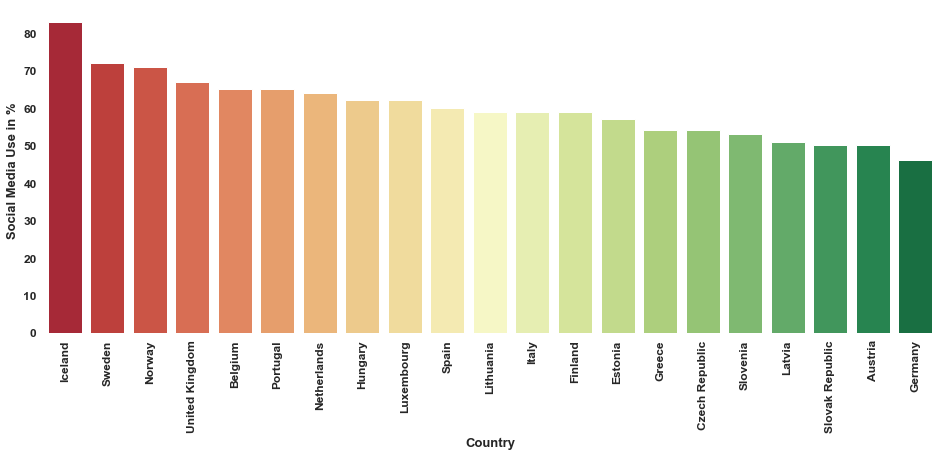

In [83]:
# Plotting Social Media by Country

social_bar_2019 = sns.barplot(x="Country", y="Percentage", data = combined_df_sorted_Per, palette = "RdYlGn" )
plt.rcParams['figure.figsize']=16,6
plt.xticks(fontsize=12, fontweight="bold",rotation='vertical')
plt.yticks(fontsize=12, fontweight="bold")
plt.xlabel('Country',fontsize=13, fontweight="bold")
plt.ylabel('Social Media Use in %',fontsize=13, fontweight="bold")
social_bar_2019.spines['right'].set_visible(False)
social_bar_2019.spines['top'].set_visible(False)
social_bar_2019.spines['left'].set_visible(False)
social_bar_2019.spines['bottom'].set_visible(False)
plt.savefig('Social_2019', dp=300)
plt.show()

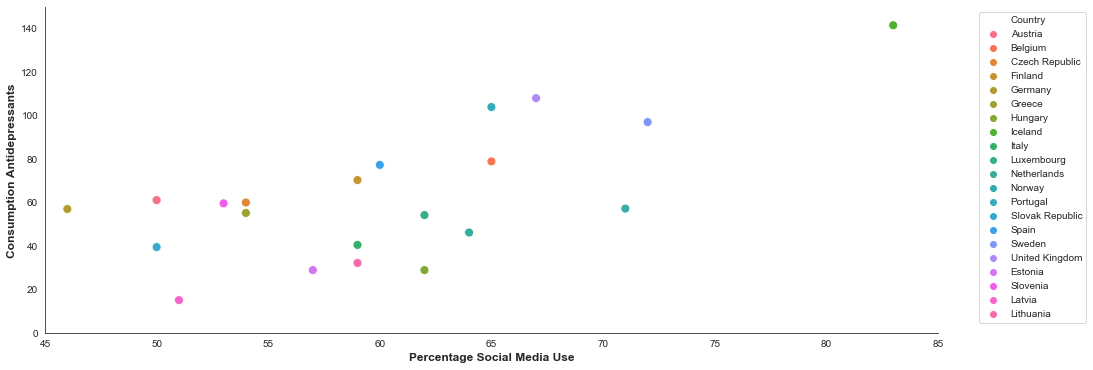

In [84]:
# Plotting Social Media & Antidepressants
# Plot Scatterplot without regression line

sc = sns.scatterplot(x='Percentage', y ='Value', hue='Country', data = combined_df,s=80)

plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
plt.xlabel('Percentage Social Media Use',fontsize=12, fontweight="bold")
plt.ylabel('Consumption Antidepressants',fontsize=12, fontweight="bold")
plt.rcParams['figure.figsize']=7,7
plt.xlim(45,85)
plt.ylim(0,150)
sc.spines['right'].set_visible(False)
sc.spines['top'].set_visible(False)
#plt.rcParams['figure.figsize']=9,7
plt.savefig('Correlation.png',dpi=300)
plt.show()


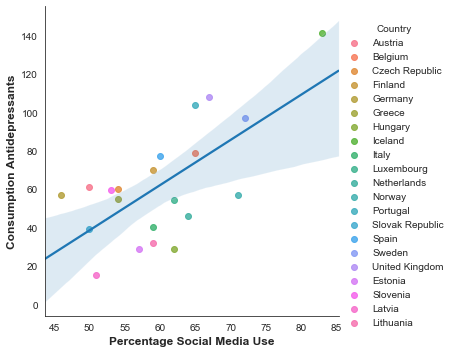

In [87]:
# Plot Scatterplot with regression line

g = sns.lmplot(x="Percentage", y="Value", hue="Country", data=combined_df, fit_reg=False)
sns.regplot(x="Percentage", y="Value", data=combined_df, scatter=False, ax=g.axes[0, 0])
plt.rcParams['figure.figsize']=9,7
plt.xlabel('Percentage Social Media Use',fontsize=12, fontweight="bold")
plt.ylabel('Consumption Antidepressants',fontsize=12, fontweight="bold")
plt.savefig('Linear Regression2.png',dpi=300)
plt.show()

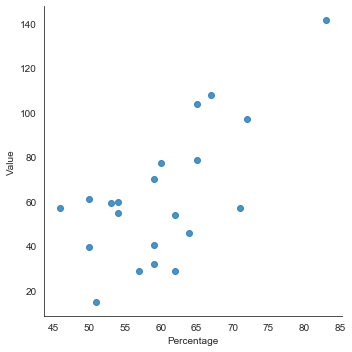

In [92]:
sns.lmplot(x="Percentage", y="Value", data=combined_df, fit_reg=False)